# Sprint 9: Correlació, escalada i enginyeria de característiques

In [1]:
# Càrrega de llibreries
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [2]:
# Lectura de la base de dades
bat10 = pd.read_csv('mlbBat10.txt', sep='\t')
bat10.head()

,name,team,position,G,AB,R,H,2B,3B,HR,RBI,TB,BB,SO,SB,CS,OBP,SLG,AVG
0,I Suzuki,SEA,OF,162,680,74,214,30,3,6,43,268,45,86,42,9,0.359,0.394,0.315
1,D Jeter,NYY,SS,157,663,111,179,30,3,10,67,245,63,106,18,5,0.340,0.370,0.270
2,M Young,TEX,3B,157,656,99,186,36,3,21,91,291,50,115,4,2,0.330,0.444,0.284
3,J Pierre,CWS,OF,160,651,96,179,18,3,1,47,206,45,47,68,18,0.341,0.316,0.275
4,R Weeks,MIL,2B,160,651,112,175,32,4,29,83,302,76,184,11,4,0.366,0.464,0.269


In [3]:
# Copia de la base de dades
bat10_c = bat10.copy()

In [4]:
# Valors únics de la variable 'team'
bat10_c['team'].unique()

array(['SEA', 'NYY', 'TEX', 'CWS', 'MIL', 'BOS', 'BAL', 'MIN', 'CIN',
       'DET', 'LAA', 'HOU', 'SD', 'LAD', 'TB', 'ATL', 'STL', 'KC', 'PIT',
       'TOR', 'FLA', 'COL', 'PHI', 'NYM', 'ARI', 'CHC', 'SF', 'WSH',
       'OAK', 'CLE'], dtype=object)

In [5]:
# Valors únics de la variable 'position'
bat10_c['position'].unique()

array(['OF', 'SS', '3B', '2B', '1B', 'DH', 'C', 'P', '-'], dtype=object)

In [6]:
# S'eliminen les variables 'name' i 'team' perquè tenen moltes categories
bat10_c = bat10_c.drop(['name','team'],axis=1)
bat10_c.head()

,position,G,AB,R,H,2B,3B,HR,RBI,TB,BB,SO,SB,CS,OBP,SLG,AVG
0,OF,162,680,74,214,30,3,6,43,268,45,86,42,9,0.359,0.394,0.315
1,SS,157,663,111,179,30,3,10,67,245,63,106,18,5,0.340,0.370,0.270
2,3B,157,656,99,186,36,3,21,91,291,50,115,4,2,0.330,0.444,0.284
3,OF,160,651,96,179,18,3,1,47,206,45,47,68,18,0.341,0.316,0.275
4,2B,160,651,112,175,32,4,29,83,302,76,184,11,4,0.366,0.464,0.269


## Exercici 1
__Normalitza els atributs categòrics en dummy. Normalitza els atributs numèrics amb StandardScaler.__

In [7]:
# Variables dummies
dummies = pd.get_dummies(bat10_c['position'],prefix='position')
dummies

,position_-,position_1B,position_2B,position_3B,position_C,position_DH,position_OF,position_P,position_SS
0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
1194,0,0,0,0,0,0,0,1,0
1195,0,0,0,0,0,0,0,1,0
1196,0,0,0,0,0,0,0,1,0
1197,0,0,0,0,0,0,0,1,0


In [8]:
# Funció que estandaritza les variables numèriques d'una base de dades
def est_dataset(dataset):
    for i in dataset.columns:
        if dataset[i].dtypes != 'O':
            media = dataset[i].mean()
            desv = dataset[i].std(ddof=0)
            dataset[i] = (dataset[i] - media) / desv
    return dataset

In [9]:
# Estandarització de la base de dades
bat10_f = est_dataset(bat10_c)
bat10_f

,position,G,AB,R,H,2B,3B,HR,RBI,TB,BB,SO,SB,CS,OBP,SLG,AVG
0,OF,2.250748,2.882719,2.079459,3.440347,2.120792,1.422407,0.292109,0.979482,2.538682,1.536060,1.493489,6.103058,3.729446,0.886488,0.662718,1.076793
1,SS,2.149786,2.792317,3.447803,2.765802,2.120792,1.422407,0.834903,1.880873,2.263835,2.404417,2.013979,2.397883,1.878233,0.776738,0.561014,0.765432
2,3B,2.149786,2.755093,3.004016,2.900711,2.675914,1.422407,2.327588,2.782264,2.813528,1.777270,2.248200,0.236531,0.489823,0.718974,0.874602,0.862300
3,OF,2.210363,2.728504,2.893069,2.765802,1.010548,1.422407,-0.386385,1.129714,1.797791,1.536060,0.478534,10.116997,7.894677,0.782514,0.332179,0.800028
4,2B,2.210363,2.728504,3.484785,2.688711,2.305833,2.046891,3.413177,2.481800,2.944977,3.031563,4.043890,1.317207,1.415429,0.926923,0.959356,0.758513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,P,-0.959836,-0.733370,-0.657230,-0.684012,-0.654819,-0.451045,-0.522083,-0.635509,-0.663880,-0.634831,-0.744618,-0.380998,-0.435784,-1.187220,-1.006928,-1.102732
1195,P,-0.939643,-0.733370,-0.657230,-0.684012,-0.654819,-0.451045,-0.522083,-0.635509,-0.663880,-0.634831,-0.744618,-0.380998,-0.435784,-1.187220,-1.006928,-1.102732
1196,P,-0.879066,-0.733370,-0.657230,-0.684012,-0.654819,-0.451045,-0.522083,-0.635509,-0.663880,-0.634831,-0.744618,-0.380998,-0.435784,-1.187220,-1.006928,-1.102732
1197,P,-0.899258,-0.733370,-0.657230,-0.684012,-0.654819,-0.451045,-0.522083,-0.635509,-0.663880,-0.634831,-0.744618,-0.380998,-0.435784,-1.187220,-1.006928,-1.102732


In [10]:
# Base de dades final
bat10_f = bat10_f.drop('position',axis=1)
bat10_f = bat10_f.join(dummies)
bat10_f.head()

,G,AB,R,H,2B,3B,HR,RBI,TB,BB,SO,SB,CS,OBP,SLG,AVG,position_-,position_1B,position_2B,position_3B,position_C,position_DH,position_OF,position_P,position_SS
0,2.250748,2.882719,2.079459,3.440347,2.120792,1.422407,0.292109,0.979482,2.538682,1.536060,1.493489,6.103058,3.729446,0.886488,0.662718,1.076793,0,0,0,0,0,0,1,0,0
1,2.149786,2.792317,3.447803,2.765802,2.120792,1.422407,0.834903,1.880873,2.263835,2.404417,2.013979,2.397883,1.878233,0.776738,0.561014,0.765432,0,0,0,0,0,0,0,0,1
2,2.149786,2.755093,3.004016,2.900711,2.675914,1.422407,2.327588,2.782264,2.813528,1.777270,2.248200,0.236531,0.489823,0.718974,0.874602,0.862300,0,0,0,1,0,0,0,0,0
3,2.210363,2.728504,2.893069,2.765802,1.010548,1.422407,-0.386385,1.129714,1.797791,1.536060,0.478534,10.116997,7.894677,0.782514,0.332179,0.800028,0,0,0,0,0,0,1,0,0
4,2.210363,2.728504,3.484785,2.688711,2.305833,2.046891,3.413177,2.481800,2.944977,3.031563,4.043890,1.317207,1.415429,0.926923,0.959356,0.758513,0,0,1,0,0,0,0,0,0


## Exercici 2
__Aplica l'anàlisi de components principals (ACP).__

In [11]:
# S'aplica el PCA a la base de dades, amb dues components principals
pca = PCA(n_components=2)
pca.fit(bat10_f)

PCA(n_components=2)

In [12]:
# Percentatge de variància explicada per cada component 
pca.explained_variance_ratio_

array([0.68968133, 0.11298839])

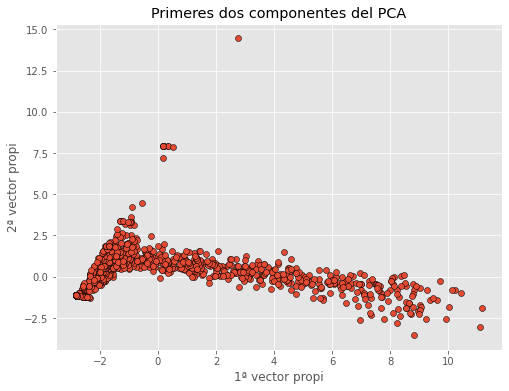

In [13]:
# Gràfic de les dues primeres components
fig = plt.figure(1, figsize=(8, 6))
X_reduced = PCA(n_components=2).fit_transform(bat10_f)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], edgecolor='k', cmap=plt.cm.Set1)
plt.title("Primeres dos componentes del PCA")
plt.xlabel("1ª vector propi")
plt.ylabel("2ª vector propi")

plt.show()

## Exercici 3
__Normalitza les dades tenint en compte els outliers.__

<span style='color:blue;font-size:18px'> <b> Escala MinMax </b> </span>

In [15]:
# Funció que aplica MinMax per a cada observació
def norm_dataset(dataset):
    for i in dataset.columns:
        if dataset[i].dtypes != 'O':
            value_min = min(dataset[i])
            value_max = max(dataset[i])
            dataset[i] = (dataset[i] - value_min) / (value_max - value_min)
            df = dataset
    return df

In [16]:
bat10_norm = norm_dataset(bat10)
bat10_norm.head()

,name,team,position,G,AB,R,H,2B,3B,HR,RBI,TB,BB,SO,SB,CS,OBP,SLG,AVG
0,I Suzuki,SEA,OF,1.000000,1.000000,0.643478,1.000000,0.612245,0.214286,0.111111,0.341270,0.763533,0.394737,0.407583,0.617647,0.500000,0.359,0.0985,0.315
1,D Jeter,NYY,SS,0.968944,0.975000,0.965217,0.836449,0.612245,0.214286,0.185185,0.531746,0.698006,0.552632,0.502370,0.264706,0.277778,0.340,0.0925,0.270
2,M Young,TEX,3B,0.968944,0.964706,0.860870,0.869159,0.734694,0.214286,0.388889,0.722222,0.829060,0.438596,0.545024,0.058824,0.111111,0.330,0.1110,0.284
3,J Pierre,CWS,OF,0.987578,0.957353,0.834783,0.836449,0.367347,0.214286,0.018519,0.373016,0.586895,0.394737,0.222749,1.000000,1.000000,0.341,0.0790,0.275
4,R Weeks,MIL,2B,0.987578,0.957353,0.973913,0.817757,0.653061,0.285714,0.537037,0.658730,0.860399,0.666667,0.872038,0.161765,0.222222,0.366,0.1160,0.269


<span style='color:blue;font-size:18px'> <b> Escala Robusta </b> </span>

In [8]:
# S'eliminen les variables categòriques
bat10_robust = bat10.copy()
bat10_robust = bat10_robust.drop(['name','team','position'],axis=1)
bat10_robust.head()

,G,AB,R,H,2B,3B,HR,RBI,TB,BB,SO,SB,CS,OBP,SLG,AVG
0,162,680,74,214,30,3,6,43,268,45,86,42,9,0.359,0.394,0.315
1,157,663,111,179,30,3,10,67,245,63,106,18,5,0.340,0.370,0.270
2,157,656,99,186,36,3,21,91,291,50,115,4,2,0.330,0.444,0.284
3,160,651,96,179,18,3,1,47,206,45,47,68,18,0.341,0.316,0.275
4,160,651,112,175,32,4,29,83,302,76,184,11,4,0.366,0.464,0.269


In [9]:
# S'aplica el métode RobustScaler, que en comptes de restar la mitjana, resta el rang interquartilic
robscal = RobustScaler().fit(bat10_robust)
robscal.transform(bat10_robust)

array([[ 1.72368421,  2.87053571,  2.67924528, ...,  0.32098765,
         0.3071066 ,  0.46332046],
       [ 1.65789474,  2.79464286,  4.0754717 , ...,  0.26234568,
         0.24619289,  0.28957529],
       [ 1.65789474,  2.76339286,  3.62264151, ...,  0.23148148,
         0.43401015,  0.34362934],
       ...,
       [-0.31578947, -0.16517857, -0.11320755, ..., -0.78703704,
        -0.6928934 , -0.75289575],
       [-0.32894737, -0.16517857, -0.11320755, ..., -0.78703704,
        -0.6928934 , -0.75289575],
       [-0.35526316, -0.16517857, -0.11320755, ..., -0.78703704,
        -0.6928934 , -0.75289575]])

In [11]:
# Dataset amb les dades escalades 
bat10_robust.iloc[:,:] = robscal.transform(bat10_robust)
bat10_robust.head()

,G,AB,R,H,2B,3B,HR,RBI,TB,BB,SO,SB,CS,OBP,SLG,AVG
0,1.723684,2.870536,2.679245,3.714286,2.636364,3.0,1.50,1.64,3.151515,2.15,1.767442,42.0,9.0,0.320988,0.307107,0.463320
1,1.657895,2.794643,4.075472,3.089286,2.636364,3.0,2.50,2.60,2.872727,3.05,2.232558,18.0,5.0,0.262346,0.246193,0.289575
2,1.657895,2.763393,3.622642,3.214286,3.181818,3.0,5.25,3.56,3.430303,2.40,2.441860,4.0,2.0,0.231481,0.434010,0.343629
3,1.697368,2.741071,3.509434,3.089286,1.545455,3.0,0.25,1.80,2.400000,2.15,0.860465,68.0,18.0,0.265432,0.109137,0.308880
4,1.697368,2.741071,4.113208,3.017857,2.818182,4.0,7.25,3.24,3.563636,3.70,4.046512,11.0,4.0,0.342593,0.484772,0.285714
